# Analysis and Plotting

## Preliminaries

In [79]:
import os
import datetime
import json
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import toolz

In [80]:
sns.set_context('paper')

In [81]:
sns.set_style('whitegrid')

In [82]:
if 'get_ipython' in globals():
    get_ipython().run_line_magic('matplotlib', 'inline')
    from IPython.display import Image, HTML
else:
    HTML = lambda *a, **kw: None

In [83]:
from textrec.paths import paths
#from textrec import analysis_util, util, notebook_util
#reload(analysis_util), reload(util), reload(notebook_util), reload(automated_analyses)
from textrec.notebook_util import images, id2img, id2url, show_images

In [84]:
os.chdir(paths.top_level)

In [85]:
friendly_names = {
    'ideal_taps_per_word_corrected': "Taps per Typo-Corrected Word"
}

## Load results of writing experiment

Prerequisites: Run `make data/analyzed/combined_data.csv`.

In [86]:
experiments = ['gc1', 'spec2']

In [87]:
experiment_level_data = pd.read_csv(paths.analyzed / f'combined_experiments.csv')
block_level_data = pd.read_csv(paths.analyzed / f'combined_blocks.csv')
trial_level_data = pd.read_csv(paths.analyzed / f'combined_data.csv', dtype={'stimulus': str})
#trial_level_data = pd.read_csv(paths.analyzed / f'trial_{batch}.csv')
#helpful_ranks_by_condition = pd.read_csv(paths.analyzed / f'helpful_ranks_by_condition_{batch}.csv').set_index('index')

recs_trials = trial_level_data.query('condition != "norecs"')

In [88]:
trial_level_data[trial_level_data['corrected_text'].isnull()]

,experiment,participant,age,english_proficiency,gender,helpfulRank-accurate-least-condition,helpfulRank-accurate-least-idx,helpfulRank-accurate-most-condition,helpfulRank-accurate-most-idx,helpfulRank-quick-least-condition,...,corrected_idealrecuse_gated,corrected_bow_recs_offered_gated,corrected_bow_recs_idealuse_gated,corrected_tapstotype_cond,corrected_efficiency,ideal_taps_per_word_corrected,first_block_condition,chars_per_sec_norecs_mean,chars_per_sec_ratio_to_norecs,chars_per_sec_ratio_to_norecs_log


In [48]:
experiment_level_data['NFC_quartile'] = np.floor(4 * experiment_level_data.NFC.rank(pct=True))

In [49]:
trial_level_data['NFC_quartile_trial'] = np.floor(4*trial_level_data.NFC.rank(pct=True))

In [51]:
t = pd.merge(experiment_level_data, trial_level_data, on='participant', how='right')

In [59]:
t[t.NFC_quartile_trial != t.NFC_quartile].loc[:, ['participant', 'NFC_x', 'NFC_quartile_trial', 'NFC_quartile']]

,participant,NFC_x,NFC_quartile_trial,NFC_quartile
228,5p7cf7,0.56,0.0,1.0
229,5p7cf7,0.56,0.0,1.0
230,5p7cf7,0.56,0.0,1.0
231,5p7cf7,0.56,0.0,1.0
232,5p7cf7,0.56,0.0,1.0
233,5p7cf7,0.56,0.0,1.0
234,5p7cf7,0.56,0.0,1.0
235,5p7cf7,0.56,0.0,1.0
236,5p7cf7,0.56,0.0,1.0
237,5p7cf7,0.56,0.0,1.0


In [47]:
np.floor(s)

0      2.0
1      1.0
2      3.0
3      2.0
4      2.0
5      1.0
6      0.0
7      3.0
8      0.0
9      1.0
10     2.0
11     0.0
12     2.0
13     0.0
14     1.0
15     0.0
16     3.0
17     2.0
18     3.0
19     1.0
20     0.0
21     0.0
22     2.0
23     1.0
24     2.0
25     3.0
26     0.0
27     2.0
28     2.0
29     1.0
      ... 
108    3.0
109    0.0
110    3.0
111    3.0
112    0.0
113    2.0
114    3.0
115    1.0
116    2.0
117    3.0
118    2.0
119    3.0
120    NaN
121    0.0
122    3.0
123    0.0
124    2.0
125    0.0
126    2.0
127    2.0
128    3.0
129    1.0
130    3.0
131    0.0
132    0.0
133    3.0
134    2.0
135    3.0
136    1.0
137    2.0
Name: NFC, Length: 138, dtype: float64

In [69]:
for col in 'participant condition stimulus'.split():
    trial_level_data[col] = trial_level_data[col].astype('category')

In [70]:
def savefig(fn):
    plt.savefig(str(paths.figures / f'combined_{fn}.pdf'), metadata={'creationDate': None})

In [71]:
experiment_level_data.gender = experiment_level_data.gender.str.strip()

In [72]:
experiment_level_data.gender.value_counts(dropna=False)

male      79
female    58
NaN        3
Name: gender, dtype: int64

In [73]:
data = dict(
    num_participants=len(set(trial_level_data.participant)),
    non_male=(experiment_level_data.gender != 'male').sum().item(),
    num_trials_per=trial_level_data.groupby('participant').size().mean().item(),
    n_trials=len(trial_level_data))

In [74]:
data

{'num_participants': 140,
 'non_male': 61,
 'num_trials_per': 12.0,
 'n_trials': 1680}

In [22]:
helpful_ranks = experiment_level_data[[col for col in experiment_level_data.columns if col.startswith('helpfulRank')]]
helpful_ranks = helpful_ranks.rename(columns={col: col[len('helpfulRank-'):] for col in helpful_ranks.columns})

helpful_ranks_by_condition = (
    helpful_ranks[[col for col in helpful_ranks.columns if col.endswith('condition')]]
    .apply(pd.value_counts)
    #.loc[['norecs', 'general', 'specific']]
    .fillna(0).astype(int))
helpful_ranks_by_idx = (
    helpful_ranks[[col for col in helpful_ranks.columns if col.endswith('idx')]]
    .apply(pd.value_counts)
    .fillna(0).astype(int))


In [23]:
data['helpful_most_votes'] = helpful_ranks_by_condition.loc[:,[col for col in helpful_ranks_by_condition.columns if 'most' in col]].sum(axis=1).to_dict()
data['helpful_most_votes']

{'always': 207, 'gated': 99, 'general': 45, 'norecs': 30, 'specific': 104}

In [24]:
data['helpful_least_votes'] = helpful_ranks_by_condition.loc[:,[col for col in helpful_ranks_by_condition.columns if 'least' in col]].sum(axis=1).to_dict()

In [25]:
HTML("Each of {num_participants} participants ({non_male} non-male) completed {num_trials_per} trials per experiment, for a total of {n_trials} trials.".format_map(data))

In [28]:
HTML("Participants spent {total_time_mean:.1f} +- {total_time_std:.1f} minutes total.".format(
    total_time_mean=experiment_level_data.total_time.mean(),
    total_time_std=experiment_level_data.total_time.std()))

In [29]:
data['used_predictive'] = {k.replace(' ', '_'): v for k, v in 
                                     experiment_level_data.use_predictive.value_counts().to_dict().items()}
data['verbalized_during'] = experiment_level_data.verbalized_during.value_counts().to_dict()
print('used_predictive', data['used_predictive'])

used_predictive {'Often': 63, 'Rarely': 45, 'Very_Rarely': 23, 'Almost_Always': 5, 'Never': 2}


In [30]:
HTML("""
Most participants reported (before beginning the study) that they used predictive typing on their phones:
""" + experiment_level_data.use_predictive.value_counts().to_frame("Used predictive typing?").to_html())

,Used predictive typing?
Often,63
Rarely,45
Very Rarely,23
Almost Always,5
Never,2


In [31]:
HTML("""
Several participants answered Yes to "While you were writing, did you speak or whisper what you were writing?":
""" + experiment_level_data.verbalized_during.value_counts().to_frame("Verbalized?").to_html())

,Verbalized?
No,113
Yes,25


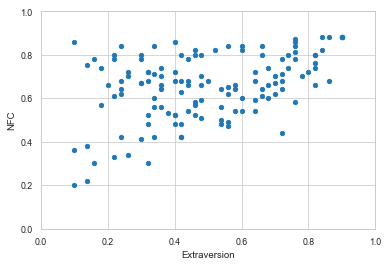

In [34]:
plt.close('all')
experiment_level_data.plot.scatter(x='Extraversion', y='NFC');
plt.xlim([0, 1])
plt.ylim([0, 1]);
savefig('trait_distribution')
HTML("""
We collected 10 items each for NFC and Extraversion.
We obtained a wider range of Extraversion than NFC.
(Min and max scales normalized to 0 and 1 respectively.)""")

In [35]:
def latexify_conds(txt):
    for cond in 'norecs specific general always gated'.split():
        txt = txt.replace(cond, f'\\S{cond}')
    return txt

In [38]:
covc = experiment_level_data.groupby('experiment').condition_order.value_counts()
covc.name = 'Num participants'
covc = covc.to_latex()
covc = covc.replace(',', ', ')
covc = latexify_conds(covc)
print(covc)
data['condition_order_table'] = covc

\begin{tabular}{llr}
\toprule
      &                         &  Num participants \\
experiment & condition\_order &                   \\
\midrule
gc1 & \Salways, \Sgated, \Snorecs &                19 \\
      & \Salways, \Snorecs, \Sgated &                18 \\
      & \Sgated, \Salways, \Snorecs &                18 \\
      & \Sgated, \Snorecs, \Salways &                18 \\
      & \Snorecs, \Salways, \Sgated &                18 \\
      & \Snorecs, \Sgated, \Salways &                18 \\
spec2 & \Sgeneral, \Snorecs, \Sspecific &                 5 \\
      & \Sgeneral, \Sspecific, \Snorecs &                 5 \\
      & \Snorecs, \Sspecific, \Sgeneral &                 5 \\
      & \Sspecific, \Sgeneral, \Snorecs &                 5 \\
      & \Sspecific, \Snorecs, \Sgeneral &                 5 \\
      & \Snorecs, \Sgeneral, \Sspecific &                 4 \\
\bottomrule
\end{tabular}



In [39]:
experiment_level_data.groupby('experiment').condition_order.value_counts().to_frame()

condition_order
experiment condition_order                         
gc1        always,gated,norecs                   19
           always,norecs,gated                   18
           gated,always,norecs                   18
           gated,norecs,always                   18
           norecs,always,gated                   18
           norecs,gated,always                   18
spec2      general,norecs,specific                5
           general,specific,norecs                5
           norecs,specific,general                5
           specific,general,norecs                5
           specific,norecs,general                5
           norecs,general,specific                4

In [40]:
def summarize_means(df, by, outcome):
    means = df.groupby(by)[outcome].mean()
    data[f'{outcome}_means'] = means.to_dict()
    return ', '.join(f'{name}={group_mean:.2f}' for name, group_mean in means.iteritems())

In [41]:
def analyze_outcome(df, by, outcome):
    plt.close('all')
    sns.barplot(x=by, y=outcome, data=df, capsize=.2)
    plt.ylabel(friendly_names.get(outcome, outcome))
    savefig(outcome)
    return summarize_means(df, by, outcome)

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=9.19, gated=10.28, general=9.55, norecs=15.07, specific=8.93'

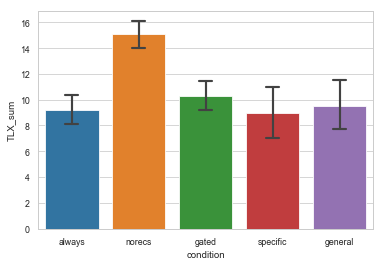

In [42]:
analyze_outcome(block_level_data, 'condition', 'TLX_sum')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


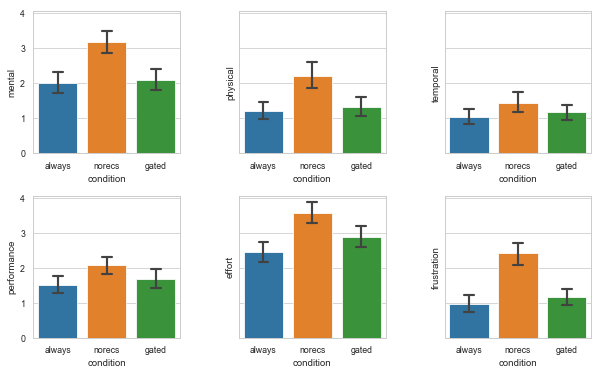

In [103]:
plt.close('all')
tlxen = 'mental physical temporal performance effort frustration'.split()
fig, axs = plt.subplots(2, 3, figsize=(10,6), sharey=True)
plt.subplots_adjust(wspace=.4, hspace=.3)
for i, facet in enumerate(tlxen):
    ax = axs.ravel()[i]
    sns.barplot(x='condition', y=facet, data=block_level_data, capsize=.2, ax=ax)
savefig('tlx_parts')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=69.14, gated=67.21, norecs=73.41'

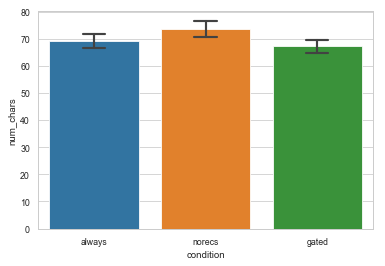

In [104]:
analyze_outcome(trial_level_data, 'condition', 'num_chars')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=13.73, gated=13.21, norecs=14.48'

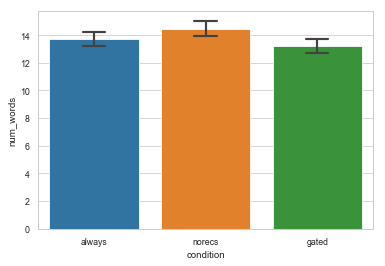

In [105]:
analyze_outcome(trial_level_data, 'condition', 'num_words')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=0.13, gated=0.13, norecs=0.20'

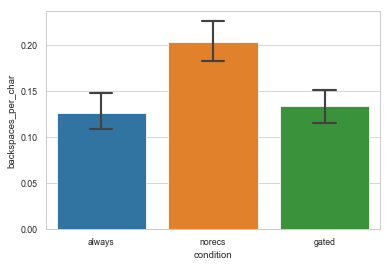

In [106]:
analyze_outcome(trial_level_data, 'condition', 'backspaces_per_char')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=0.00, gated=0.00, norecs=0.00'

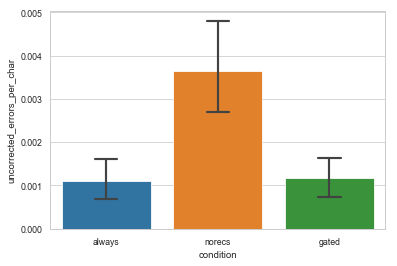

In [107]:
analyze_outcome(trial_level_data, 'condition', 'uncorrected_errors_per_char')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=8.95, gated=8.84, norecs=14.79'

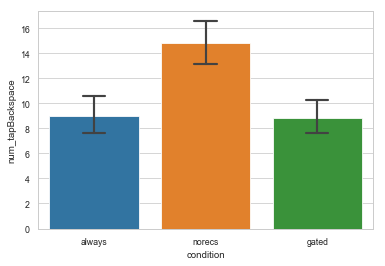

In [108]:
analyze_outcome(trial_level_data, 'condition', 'num_tapBackspace')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=2.09, gated=2.00, norecs=1.99'

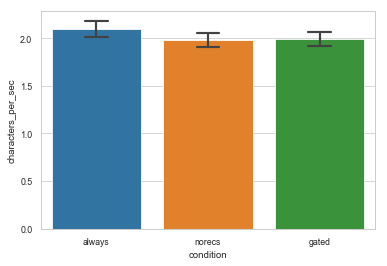

In [109]:
analyze_outcome(trial_level_data, 'condition', 'characters_per_sec')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=0.26, gated=0.27'

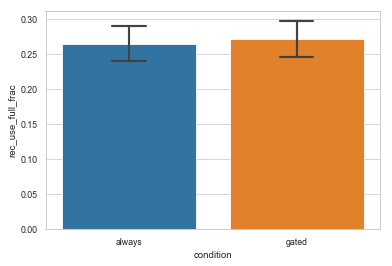

In [110]:
analyze_outcome(recs_trials, 'condition', 'rec_use_full_frac')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=0.50, gated=0.54, norecs=0.41'

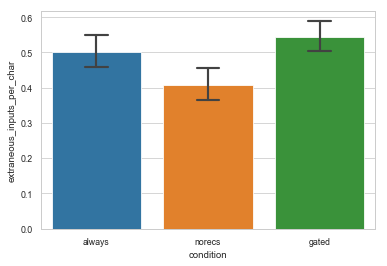

In [111]:
analyze_outcome(trial_level_data, 'condition', 'extraneous_inputs_per_char')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=0.25, gated=0.24'

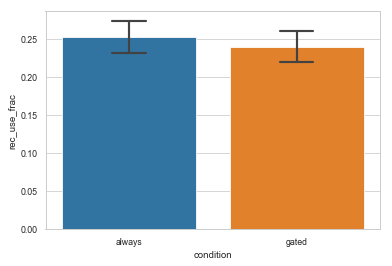

In [112]:
analyze_outcome(recs_trials, 'condition', 'rec_use_frac')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=0.26, gated=0.27'

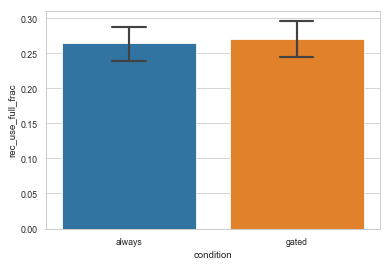

In [113]:
analyze_outcome(recs_trials, 'condition', 'rec_use_full_frac')

0.7763700056164978

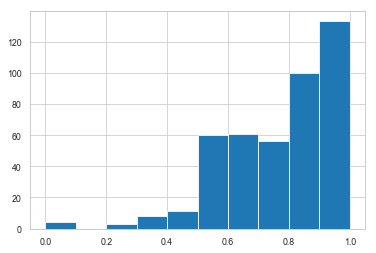

In [114]:
condition = 'gated'
trials = trial_level_data[trial_level_data.condition == condition]
useful_if_shown = (trials.orig_bow_recs_idealuse_cond / trials.orig_bow_recs_offered_cond)
useful_if_shown.hist()
useful_if_shown.mean()

0.6072334366184061

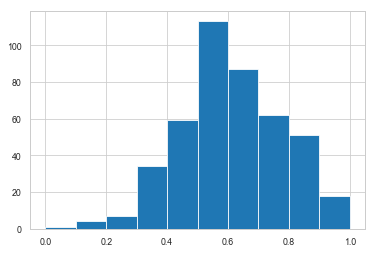

In [115]:
condition = 'always'
trials = trial_level_data[trial_level_data.condition == condition]
useful_if_shown = (trials.orig_bow_recs_idealuse_cond / trials.orig_bow_recs_offered_cond)
useful_if_shown.hist()
useful_if_shown.mean()

In [116]:
weird_ttts = trial_level_data[trial_level_data.orig_tapstotype_cond > trial_level_data.num_taps]
if len(weird_ttts) > 0:
    print("SOME WEIRD TapsToType")
    print(weird_ttts.loc[:,['participant', 'stimulus', 'text', 'condition', 'num_taps', 'orig_tapstotype_cond']])

In [117]:
print('\n\n'.join(x for x in experiment_level_data['techDiff'] if isinstance(x,str)))

None

No

No

No

Nope

No

No

None

None

No

No

No

No

No

No

None

No

None

No

No

No

No

No

Na

No.

No

No

No

No. 

None

No

No

No

None

No

No difficulties 

No.

no

No. 

No

No

No

No

None

No

No

No

No

No

No

No

No

No

No

No

No

No

No

None.

Nope

No

Nope

No

No

No

No

No

No

No

Nope

No

None

Nope

No.

No

None

No

No

No

No


In [118]:
print('\n\n'.join(x for x in experiment_level_data['other'] if isinstance(x, str)))

I think everything went well and the survey had no problems 

The experiment was easy to understand

It went fine. Not too bad. 

I thought it was better than most

It was an interesting survey due to its uniqueness. 

I wish it worked better in landscape mode, since I find it easier to type that way

It went well

The experiment seemed to go pretty well, tough I did notice I ended up having some typos I didn't fix. I guess  I just accidentally overlooked them at the time, I apologize. I tried to be as accurate as possible.

Thanks!

I enjoyed the experiment! Nice change up from normal mturk studies. Appreciate you allowing me to participate.

Enjoyed it.I wish I didn't have to do it in portrait mode - I am very slow that way.

It was okay, as long as you got the data you were looking for. I hope my answers were acceptable. Thank you for letting me participate. 

Great experiment! I really enjoyed it even though the keyboards took a bit of getting used to! 

My screen keep getting big 

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'always=1.65, gated=1.74, norecs=1.79'

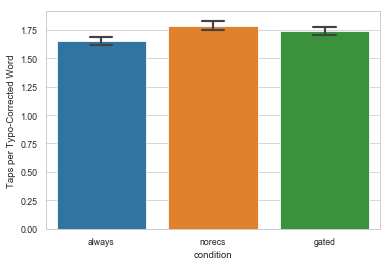

In [122]:
analyze_outcome(trial_level_data, 'condition', 'ideal_taps_per_word_corrected')

In [56]:
import yaml

In [108]:
with open(data_fname, 'w') as f:
    yaml.safe_dump(data, f)

In [109]:
assert False

AssertionError: 

In [ ]:
num_details = pd.read_csv(paths.data / 'num_details_spec1.csv').rename(columns={
    'image_id': 'stimulus',
    'text': 'corrected_text'
})

In [ ]:
with_num_details = pd.merge(
    trial_level_data,
    num_details,
    on=('stimulus', 'corrected_text'),
#     right_on=('image_id', 'text'),
    how='outer')

In [ ]:
with_num_details

In [ ]:
sns.barplot(x='condition', y='num_details', data=with_num_details, capsize=.2)

In [ ]:
with_num_details.num_details.describe()

In [ ]:
print('\n'.join(with_num_details.sort_values('num_details').text.iloc[-5:]))

In [ ]:
with_num_details.to_csv('with_num_details.csv')

Bonus the most specific captions for each image. Some participants wrote the most specific captions for several images, so they get mulitple bonuses.

In [ ]:
with_num_details.sort_values('num_details', ascending=False).drop_duplicates(['stimulus']).loc[:,['participant', 'corrected_text', 'num_details']].groupby('participant').size() * 0.50

In [ ]:
from textrec import onmt_model_2

In [ ]:
def get_recs_cap(cocoid, context, prefix=None):
    return onmt_model_2.get_recs('coco_cap', str(cocoid), context, prefix=prefix)

def get_recs_lm(cocoid, context, prefix=None):
    return onmt_model_2.get_recs('coco_lm', '.', context, prefix=prefix)

In [ ]:
get_recs_cap(71815, 'a'.split(), prefix='t')

In [ ]:
from functools import partial

In [ ]:
txt = "a tennis player swinging at a ball"
txt[:0].rsplit(' ', 1)

In [ ]:
txt.rindex(' ')

In [ ]:
def taps_to_type(rec_gen, txt):
    actions = []
    # Invariant: performing [actions] types txt[:idx]
    idx = 0
    while idx < len(txt):
        sofar = txt[:idx]
        if ' ' in sofar:
            last_space_idx = sofar.rindex(' ')
        else:
            last_space_idx = -1
        prefix = sofar[:last_space_idx + 1]
        cur_word = sofar[last_space_idx + 1:]
        cur_desired_word = txt[last_space_idx + 1:].split(' ', 1)[0]
#         if cur_desired_word[-1] in ',.;-':
#             cur_desired_word = cur_desired_word[:-1]
#         print(repr(prefix), repr(cur_word), repr(cur_desired_word))
        recs = rec_gen(onmt_model_2.tokenize(prefix), prefix=cur_word)
        words = [word for word, rec in recs]
        print(prefix, words)
        if cur_desired_word in words:
            actions.append(dict(type='rec', which=words.index(cur_desired_word), word=cur_desired_word))
            idx = last_space_idx + 1 + len(cur_desired_word) + 1
        else:
            actions.append(dict(type='key', key=txt[idx]))
            idx += 1
        print(actions[-1])
    return actions
taps_to_type(partial(get_recs_cap, 71815), "a young man wearing a red shirt and holding a white and red tennis racket")

In [ ]:
if False:
    writer = pd.ExcelWriter('specificity_details.xlsx')
    for stim, group in trial_level_data.groupby('stimulus'):
        group.loc[:,['corrected_text']].to_excel(writer, str(stim))
    writer.close()

In [ ]:
if False:
    for stim, txts in trial_level_data.groupby('stimulus').text:
        print()
        print(stim)
        print('\n'.join(txts))
        txts.to_csv(f'{stim}.csv', index=False)

In [123]:
%load_ext rpy2.ipython

In [111]:
%%R
install.packages("brms")


/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: also installing the dependencies ‘miniUI’, ‘PKI’, ‘RCurl’, ‘RJSONIO’, ‘packrat’, ‘igraph’, ‘StanHeaders’, ‘ggridges’, ‘colourpicker’, ‘dygraphs’, ‘gtools’, ‘rsconnect’, ‘shinyjs’, ‘shinythemes’, ‘threejs’, ‘mvtnorm’, ‘Brobdingnag’, ‘rstan’, ‘loo’, ‘rstantools’, ‘bayesplot’, ‘shinystan’, ‘bridgesampling’, ‘matrixStats’, ‘nleqslv’, ‘coda’


  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/miniUI_0.1.1.1.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRunt

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: downloaded 967 KB


  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/threejs_0.3.1.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  length 843444 bytes (823 KB)

  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: downloaded 823 KB


  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/mvtnorm_1.0-8.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  done

  warnings.warn(x, RRuntimeWarning)


In [124]:
%%R
library(ARTool)

In [141]:
trial_level_filtered = trial_level_data.loc[:, 'participant block condition stimulus ideal_taps_per_word_corrected'.split()]

In [142]:
%Rpush trial_level_filtered

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:190: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [138]:
%%R
summary(trial_level_filtered)

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:190: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


  participant        age       english_proficiency   gender.0        
 26cj6j :  12   Min.   :19.0   Length:1308         Length:1308       
 26f62q :  12   1st Qu.:27.0   Class :character    Class :character  
 2xj467 :  12   Median :31.0   Mode  :character    Mode  :character  
 32fr2w :  12   Mean   :34.3                                         
 37jqj6 :  12   3rd Qu.:38.0                                         
 3cm2qq :  12   Max.   :61.0                                         
 (Other):1236                                                        
   gender.1           gender.2           gender.3           gender.4        
 Length:1308        Length:1308        Length:1308        Length:1308       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                       

In [139]:
%%R
transformed <- art(ideal_taps_per_word_corrected ~ condition + (1|participant) + (1|stimulus), data=trial_level_filtered)

In [140]:
%%R
summary(transformed)

Aligned Rank Transform of Factorial Model

Call:
art(formula = ideal_taps_per_word_corrected ~ condition + (1 | 
    participant) + (1 | stimulus), data = trial_level_data)

Column sums of aligned responses (should all be ~0):
condition 
        0 

F values of ANOVAs on aligned responses not of interest (should all be ~0):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                


In [143]:
%%R
anova(transformed)

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in deparse(x, 500L) : Interrupted

  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Warning message:

  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: In beta - betaH :
  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  longer object length is not a multiple of

KeyboardInterrupt: 